# Exploratory Data Analysis
IUM projekt - 2021Z

Zadanie 8, wariant 3

Authors: Michał Łątkowski, Vladyslav Kyryk

Task - optimalisation of products ordering for next week by predicting the demand

In [3]:
# Adding autoreload will let you edit your package and see the changes without restarting the notebook.

%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
from datetime import datetime
import calendar

## Data import

In [5]:
deliveries = pd.read_json("../data/raw/deliveries.jsonl", lines=True)
products = pd.read_json("../data/raw/products.jsonl", lines=True)
sessions = pd.read_json("../data/raw/sessions.jsonl", lines=True)
users = pd.read_json("../data/raw/users.jsonl", lines=True)

## EDA continuation

In [8]:
buy_sessions = sessions[sessions['event_type'] == 'BUY_PRODUCT']

In [14]:
buy_sessions

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
2,100001,2021-01-09 20:27:33,104.0,1043.0,BUY_PRODUCT,0,20001.0
29,100002,2021-01-09 16:11:11,107.0,1297.0,BUY_PRODUCT,10,20002.0
46,100003,2021-01-09 20:33:15,NaN,1015.0,BUY_PRODUCT,5,20003.0
65,100006,2021-01-08 05:23:04,108.0,1078.0,BUY_PRODUCT,10,20004.0
186,100011,2021-01-10 19:50:56,114.0,1169.0,BUY_PRODUCT,0,20005.0
...,...,...,...,...,...,...,...
173249,109837,2021-01-03 02:05:42,NaN,1036.0,BUY_PRODUCT,5,22971.0
173258,109838,2021-01-02 22:00:31,218.0,1042.0,BUY_PRODUCT,5,22972.0
173462,109854,2021-01-01 21:30:29,276.0,1069.0,BUY_PRODUCT,15,22973.0
173617,109862,2021-01-03 04:38:40,297.0,1136.0,BUY_PRODUCT,0,22974.0


### How many clients had 1 sessions, how many had 2 sessions, and so on...

<AxesSubplot:xlabel='session_count'>

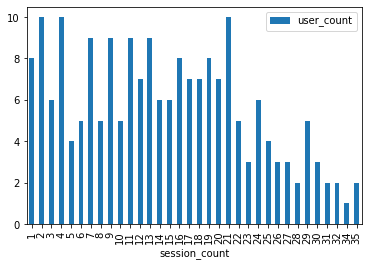

In [44]:
prod_count_per_user = buy_sessions[['session_id', 'user_id']].dropna().groupby(by='user_id', as_index=False).count().rename(columns={'session_id': 'session_count'})
user_count_per_prod_count = prod_count_per_user.groupby(by='session_count').count().rename(columns={'user_id': 'user_count'})
user_count_per_prod_count.plot.bar()

### How many clients bought 1 product, how many bought 2 products, and so on...

<AxesSubplot:xlabel='product_count'>

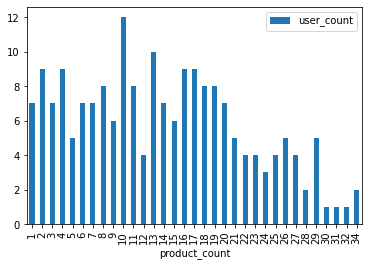

In [42]:
prod_count_per_user = buy_sessions[['product_id', 'user_id']].dropna().groupby(by='user_id', as_index=False).count().rename(columns={'product_id': 'product_count'})
user_count_per_prod_count = prod_count_per_user.groupby(by='product_count').count().rename(columns={'user_id': 'user_count'})
user_count_per_prod_count.plot.bar()